<a href="https://colab.research.google.com/github/kamaldyaz/computer_vison/blob/main/car_plate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ultralytics opencv-python matplotlib easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 27.2 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import easyocr

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
model = YOLO('yolov8x.pt')


100%|██████████| 131M/131M [00:00<00:00, 261MB/s]


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
image_path = '/content/drive/MyDrive/car_plate/car.jpg'

In [6]:
image = cv2.imread(image_path)
results = model.predict(image)
reader = easyocr.Reader(['en'])
result = results[0]
result


0: 640x480 1 car, 223.8ms
Speed: 12.4ms preprocess, 223.8ms inference, 1630.5ms postprocess per image at shape (1, 3, 640, 480)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

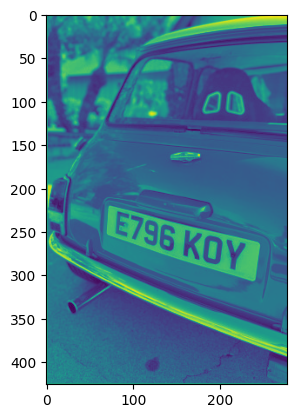

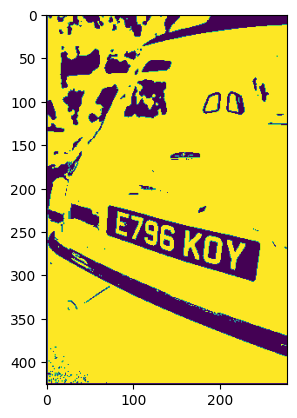

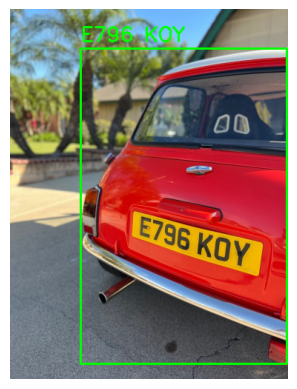

In [10]:
license_plates_text = []
for box in result.boxes:
  x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
  class_id = int(box.cls.tolist()[0])
  label = result.names[class_id]

  if label in ["car", "vehicle"]:

    license_plate_img = image[y1:y2, x1:x2]

    license_plate_img_gray = cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2GRAY)
    _, license_plate_img_binary = cv2.threshold(license_plate_img_gray, 128, 255, cv2.THRESH_BINARY_INV)

    plt.imshow(license_plate_img_gray)
    plt.show()
    plt.imshow(license_plate_img_binary)
    plt.show()

    plate_text = reader.readtext(license_plate_img_binary, detail=0)

    plate_text_combined = ' '.join(plate_text)

    if plate_text_combined:
      license_plates_text.append(plate_text_combined)
      cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
      cv2.putText(image, plate_text_combined, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [11]:
if license_plates_text:
  print("Detected License Plates:")
  for i, plate_text in enumerate(license_plates_text, 1):
    print(f"{plate_text}")
else:
  print("No license plates detected.")

Detected License Plates:
E796 KOY
